# 5. 모델 평가와 성능 향상
## 모델에 대한 평가 : 일반화의 정도 / 새 데이터에 대한 정확도
### 평가 지표
### 1. 정확도(accuracy)
### 2. R squared value
### 3. cross validataion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import mglearn

from sklearn.model_selection import train_test_split

## 5.1 교차 검증
### 데이터 분할(train, test) 를 여러번 나누고 여러 모델을 학습 : 안정적인 통계 평가방법
### k-fold cross-validation(모델, input, target, cv =  ) 
#### fold(비슷한 크기의 부분집합) - 이것이 test data 가 된다.
#### 나머지 데이터로 학습, 이것을 k번 하는 것 / k 개의 정확도를 얻는다. / k개의 평균을 모델의 최종 정확도로 삼는다.

## 5.1.1 scikit-learn 의 교차검증
#### 매개변수
#### 1. 평가하려는 모델
#### 2. input data(test)
#### 3. output data(test)
#### 4. cv(k fold의 수) = 3(default)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logi = LogisticRegression()

scores = cross_val_score(logi, iris.data, iris.target)
#교차검증은 모델을 fitting 하지 않는다. 단지 모델의 일반화를 측정할 뿐
# 즉 test 나 validation data 를 사용하지 않고, train data 로 
# 여러번의 fitting 과 평가를 수행하는 것(test 와 validation 의 정보누출 x)

print('cross validation score : {}'.format(scores))

# k 의 default 값은 3이다.
# 각 fold 에 대한 정확도(accuracy) 점수

cross validation score : [0.96078431 0.92156863 0.95833333]


In [3]:
# k 는 cv 매개변수를 통해 정할 수 있다.
cross_val_score(logi, iris.data, iris.target, cv = 5)

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [4]:
# 주로 k 개의 정확도의 평균을 모델의 최종 정확도로 삼는다.
cross_val_score(logi, iris.data, iris.target, cv = 5).mean()

0.9600000000000002

## 5.1.2 교차 검증의 장점
### 교차검증에서 점수를 높이기 위해서는 모든 샘플에 대해 모델이 잘 일반화 되어야 한다.
### 데이터를 여러번 나누므로 모델의 민감도를 알 수 있다.
#### - k 개의 정확도의 범위를 보면 된다. (서로 비슷한지, 아니면 각각 정확도가 천차만별인지)
### 분할이 1번일 때보다 데이터를 더 효과적으로 사용
#### - train 에 들어가는 데이터의 수가 더 많다.
####  train_test_split : 무작위로 나누기 때문에, 샘플의 분류 난이도가 골고루 들어가지 못하는 문제가 발생할 수 있다.
### 교착 검증의 단점 : 연산비용

## 5.1.3 계층별 k-겹 교차 검증과 그외 전략들
### 단순 k fold cross validataion : 나열 순서대로 k개의 fold 로 나누는 것이 좋지 않을 때도 있다.
#### iris data 처럼 target 이 순서대로 정렬되어 있는 경우, 각 모델은 편중된 학습을 한다.
### 따라서 fold 를 데이터 전체의 비율로 선택하는 계층적 k fold cross validataion 을 해야한다.
#### - A : 90% , B:10% 인 경우 각 폴드는 이 비율을 따라 나누어진다.

### croos_val_score() 에서 폴드를 나눌 때 
#### 분류 : StratifiedKFold - 무작위 나누기
#### 회귀 : 단순한 KFold - 순서대로 나누기

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
print('Iris 레이블 : \n {}'.format(iris.target))
# 이와 같이 target value 가 정렬되어 있는경우 단순 k fold  cross validation 을 수행하면,
## 편중된 학습을 한다.

Iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# 아니면 np.random.permutation 을 이용해서 index 를 랜덤하게 섞은 다음에 
# 단순 k fold cross validataion 을 해도 무작위성이 생기지 않을까?
iris.target[ np.random.permutation(len(iris.target)) , ]
# 이렇게 하면 되지 않을까

array([2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

### 교차 검증 상세 옵션
#### cv 매개변수에 '교차 검증 분할기' 옵션을 전달
#### 1. '교차 검증 분할기' 인스턴스를 생성 후 (KFold or StratifiedKFold)
#### 2. cross_val_score( cv = 해당 인스턴스 )

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5) # fold 의 수를  5개로 하여 단순 KFold 로 데이터를 나눈다.

cross_val_score(logi, iris.data, iris.target, cv = kf) 

# target 변수가 3개 이고 나열되어 있고, 단순 KFold 로 데이터를 분할 하였는데도
# fold 수를 5개로 하여 target 변수의 수와 같지 않으므로
# 이상하게 나오지는 않았다.

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [8]:
# 만약 fold 수를 3으로(target 변수의 수와 같게) 한다면 성능 측정이 이상해진다.
kf3 = KFold(n_splits = 3)

cross_val_score(logi, iris.data, iris.target, cv = kf3)
# 데이터 분할이 편중된 학습을 유도하기 때문이다.

array([0., 0., 0.])

In [9]:
# 데이터를 무작위로 섞는 KFold 의 shuffle = True 인자

kf3_shuffle = KFold(n_splits = 3, shuffle = True, random_state = 0)

cross_val_score(logi, iris.data, iris.target, cv =kf3_shuffle)
# 편중된 학습을 방지하도록 shuffle 인자를 주어 정상적인 평가 결과가 나왔다.

array([0.9 , 0.96, 0.96])

### LOOCV 
#### fold 에 sample 이 1개만 있는 k fold cross validataion
#### fold 에 sample 이 1개 이므로 , 총 fold 의 수(= 반복의 수) 는 sample 수(n개) 만큼이다.
#### sklearn.model_selection.LeaveOneOut 메서드

In [10]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
score = cross_val_score(logi, iris.data, iris.target, cv = loo)


print('각 fold 에서의 정확도 : \n {}'.format(score))
# 총 150개의 정확도(sample 수 만큼) 반환한다.

print('교차 검증 분할 횟수 : {}'.format(len(score)))
print('평균 정확도 : {:.2f}'.format(score.mean()))

각 fold 에서의 정확도 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
교차 검증 분할 횟수 : 150
평균 정확도 : 0.95


### 임의 분할 교차 검증
#### 더 유연한 교차 검증
#### trian_size : train data 크기
#### test_size : test data 크기
#### n_splits : 반복 횟수

### 유용성
#### train 크기, test 크기와 n_split(반복횟수) 를 독립적으로 사용하기 원할 때
##### - 앞의 교차 검증은 n_split에 따라 train((k-1)/k)과 test (1/k)의 크기가 정해졌다.
#### 부분 샘플링 : 전체 데이터 셋을 사용하기 버거울 때(대용량 데이터)

c:\program files\python36\lib\site-packages\mglearn\plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


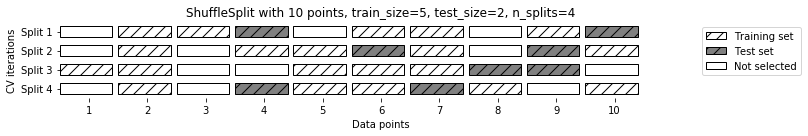

In [11]:
mglearn.plots.plot_shuffle_split()

In [12]:
# 단순 임의분할 교차 검증 ShuffleSplit
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = .2, train_size = .6, n_splits = 10)

cross_val_score(logi, iris.data, iris.target, cv = shuffle_split)

array([1.        , 0.96666667, 0.96666667, 1.        , 0.9       ,
       1.        , 0.96666667, 0.96666667, 0.96666667, 1.        ])

### 그룹별 교차 검증
#### 예시 : 얼굴 표정 인식 ( 같은 사람의 다른표정끼리 그룹으로 묶는다.)
#### sklearn.model_selection.GroupKFold

In [13]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 12, random_state = 0)
#  임의의 clustering 데이터를 만든다

In [14]:
X

array([[ 3.54934659,  0.6925054 ],
       [ 1.9263585 ,  4.15243012],
       [ 0.0058752 ,  4.38724103],
       [ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [-0.49772229,  1.55128226],
       [-1.4811455 ,  2.73069841],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [ 2.49913075,  1.23133799]])

In [15]:
y # 사람의 얼굴 표정

array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1])

In [16]:
# 3, 4, 2, 3 개씩 같은 그룹(같은 사람) 인 경우
groups = [0] * 3 + [1] * 4 + [2] * 2 + [3] * 3   # 이와 같이 같은 그룹끼리 같은 숫자로 묶어준다.

gkf = GroupKFold(n_splits = 3)

cross_val_score(logi, X, y , groups , cv = gkf)  # cross_val_score 에 그룹을 인자로 준다.

array([0.75      , 0.8       , 0.66666667])

## 5.2 그리드 서치
### 모델에서 매개변수 튜닝을 통해 성능을 향상시키는 것
### 중요 매개변수의 가능한 모든 조합을 탐색하는 방법
#### 여러 매개변수의 가능한 조합을 테이블(그리드) 형태로 나타낸다고 하여 붙여진 이름
#### 모델마다 매개변수가 다르다. 매개변수의 의미를 파악하는 것이 중요

In [17]:
# RBF 커널 SVM을 사용하여 예제를 보자
# gamma 와 C

## 5.2.1 간단한 그리드 서치

In [18]:
#  간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 0)

print('훈련 세트의 크기 : {} \n 테스트 세트의 크기 : {}'.format(X_train.shape[0], X_test.shape[0]))

훈련 세트의 크기 : 112 
 테스트 세트의 크기 : 38


In [19]:
best_score = 0

parameter_list = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in parameter_list:
    for C in parameter_list:
        # 매개변수의 각 조합에 대해 학습
        svm = SVC(gamma = gamma, C= C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameter = {'gamma' : gamma , 'C' : C}
            
            
print('최고 점수 : {:.3f} \n최고 parameter : {}'.format(best_score, best_parameter))

최고 점수 : 0.974 
최고 parameter : {'gamma': 0.001, 'C': 100}


## 5.2.2 매개변수 과대적합과 검증 세트
### test 세트로 매개변수를 튜닝하면, 새로운 데이터에 대한 정확도까지 확장되지 않을 수 있다.
#### -> 하나의 데이터셋이 더 필요하다
### 1. 훈련 세트 : 모델 만들기(학습)
### 2. 검증 세트 : 매개변수 튜닝(그리드 서치 등등)
#### - 검증 세트에서 최적의 매개변수를 찾고, 그 매개변수로 학습(이때는 '훈련 + 검증용' 세트로 )
### 3. 테스트 세트 : 선택된 매개변수 성능 평가
#### - 가장 좋은 매개변수로 튜닝된 모델(SVM, randomForest...)들 끼리 비교 

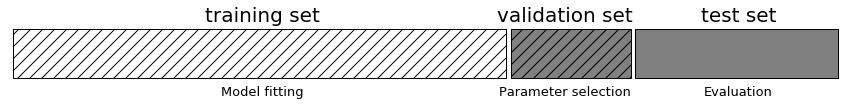

In [20]:
mglearn.plots.plot_threefold_split()

In [21]:
# 검증용 세트에서 최적의 매개변수를 구하고, 그 매개변수로 fix 한 후 훈련용 + 검증용 데이터로 학습을 시켜
## 마지막으로 테스트

In [22]:
## 데이터 분할(훈련, 검증, 테스트)
# 1. 전체 -> (훈련 + 검증) / 테스트
# 2. (훈련 + 검증) -> 훈련/ 검증

## 결과 : 전체 -> 훈련 / 검증 / 테스트

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target,
                                                                     random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state = 1)

print('훈련 세트 크기 : {}'.format(X_train.shape[0]))
print('검증 세트 크기 : {}'.format(X_val.shape[0]))
print('테스트 세트 크기 : {}'.format(X_test.shape[0]))

훈련 세트 크기 : 84
검증 세트 크기 : 28
테스트 세트 크기 : 38


In [23]:
## 훈련 세트와 검증 세트를 이용해 
### 좋은 매개변수 찾기

# train : 학습
# val : 검증(테스트) - 매개변수 찾기
best_score = 0

parameter_list = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in parameter_list:
    for C in parameter_list:
        # 매개변수의 각 조합에 대해 학습
        svm = SVC(gamma = gamma , C= C)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameter = {'gamma' : gamma , 'C' : C}
            
            
print('최고 점수 : {:.3f} \n최고 parameter : {}'.format(best_score, best_parameter))

최고 점수 : 0.964 
최고 parameter : {'gamma': 0.001, 'C': 10}


In [24]:
# 최적의 매개변수
## gamma : 0.001
## C : 0.001

# 이 매개변수로 고정 후 
# train + validation 데이터 전체 : 학습
# test : 평가

svm = SVC(**best_parameter)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print('최적 매개변수 : {} \n에서의 test 점수 : {:.2f}'.format(best_parameter, test_score))

최적 매개변수 : {'gamma': 0.001, 'C': 10} 
에서의 test 점수 : 0.92


## 5.2.3 교차 검증을 사용한 그리드 서치
### GridSearchCv
### 훈련, 검증, 테스트 세트를 분할하는 기준이 모호
#### 할때마다 최적의 매개변수가 다르게 나오는 경우 발생 -> 따라서 신뢰성을 위해 여러번 실행(교차 검증)
#### 만들어지는 모델 수
#### 각 parmameter 의 튜닝해볼 수들의 곱 * k(k겹)

In [25]:
# 교차검증을 통한 최적의 매개변수 찾기
## train, valid, test 로 나눌 필요 없음
## 나누는 기준은 교차검증 매개변수(cv) 와 방식(KFold, StratifiedKFold, GroupKFold, .... )로 조정

for gamma in parameter_list:
    for C in parameter_list:
        svm = SVC(gamma = gamma, C = C) # 해당 매개변수로 인스턴스 생성
        
        score_list = cross_val_score(svm, iris.data, iris.target, cv = 5)
        score = np.mean(score_list) # 교차검증을 통해 구한 해당 매개변수의 일반화 점수
        
        if score > best_score:
            best_score = score
            best_parameter = {'gamma' : gamma, 'C' : C}

print('교차검증에서 최적의 매개변수 : {}'.format(best_parameter))

교차검증에서 최적의 매개변수 : {'gamma': 0.001, 'C': 100}


In [26]:
# 교차검증을 통해 구한 최적의 매개변수로 fitting 한 후 (학습 + 검증용 의 합 데이터로)
## test 해본다.

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_trainval, y_trainval, random_state = 1)


svm = SVC(**best_parameter)
svm.fit(X_trainval, y_trainval)

print('최적의 매개변수에서의 test 점수 : {:.3f}'.format(svm.score(X_test, y_test)))

최적의 매개변수에서의 test 점수 : 0.929


c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\ut

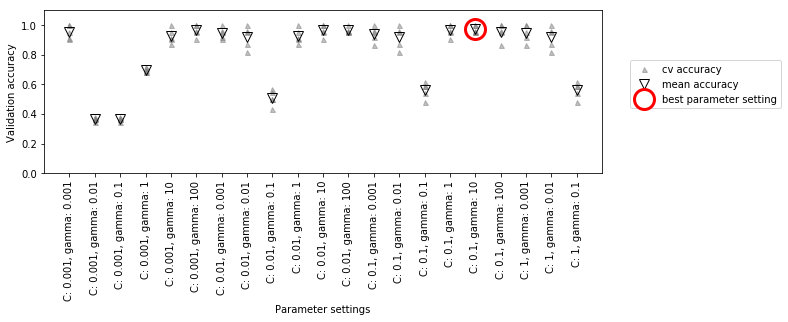

In [27]:
mglearn.plots.plot_cross_val_selection()
# 앞의 코드에서 최적 parameter 를 찾는 과정을 보여준다.

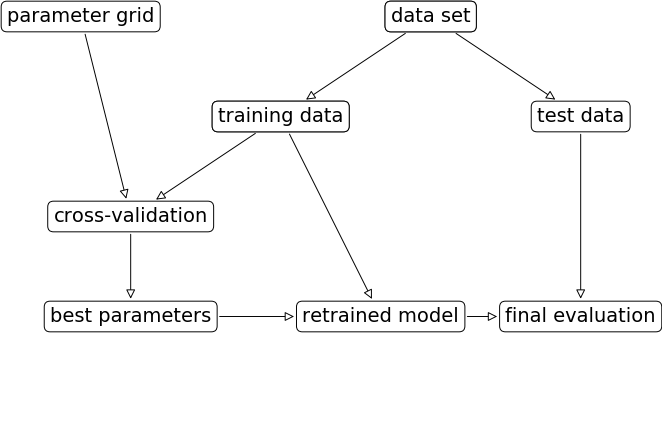

In [28]:
mglearn.plots.plot_grid_search_overview()

In [29]:
# GridSearchCV() 사용
# 딕셔너리 형태로 검색 대상 매개변수 지정

from sklearn.model_selection import GridSearchCV

param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                   'gamma' : [0.001, 0.01, 0.1, 1, 10, 100] }

grid_search = GridSearchCV(SVC(), param_grid, cv = 5)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [31]:
grid_search.fit(X_train, y_train)

# fit 메서드 : 최적의 매개변수 찾기 / 훈련 데이터 세트에 있는 새로운 모델을 자동으로 생성

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# predict, score 메서드 : 학습된 모델에 접근

grid_search.score(X_test, y_test)
# score 메서드를 통해 test 셋에 대한 점수를 매긴다.

0.9736842105263158

In [33]:
# 선택된 매개변수 보기 : best_params_
print('최상의 매개변수 : {}'.format(grid_search.best_params_))
print('최상 교차 검증 점수 : {:.3f}'.format(grid_search.best_score_)) 
# 혼동 x : 교차검증 수행 후 가장 좋은 매개변수로 만든 모델에 대한 교차 검증 점수

최상의 매개변수 : {'C': 100, 'gamma': 0.01}
최상 교차 검증 점수 : 0.973


In [34]:
# 최고 성능 모델 보기
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 교차 검증 결과 분석
#### 시각화 : 매개변수가 모델의 일반화에 미치는 영향 파악 가능
#### cv_results_ : 그리스 서치의 결과 반환

In [35]:
grid_search.cv_results_

c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\ut

{'mean_fit_time': array([0.00199938, 0.0015996 , 0.00119934, 0.00119982, 0.00099912,
        0.00199885, 0.00120139, 0.00099936, 0.00119882, 0.00099921,
        0.00119915, 0.00179887, 0.00119963, 0.00119901, 0.00099931,
        0.00139198, 0.00119963, 0.00179992, 0.00119953, 0.00079932,
        0.00060349, 0.00079694, 0.00139894, 0.00199895, 0.00060239,
        0.00079637, 0.00059958, 0.00079951, 0.00159898, 0.00179815,
        0.0009994 , 0.00079956, 0.00060244, 0.00079985, 0.00219817,
        0.00220284]),
 'mean_score_time': array([0.00100002, 0.00080175, 0.00039988, 0.00039959, 0.00039978,
        0.00040011, 0.00060329, 0.00059953, 0.00019646, 0.00059991,
        0.00039973, 0.        , 0.00079937, 0.        , 0.00039992,
        0.00040016, 0.00040369, 0.00059657, 0.00059972, 0.00039992,
        0.00059943, 0.00039978, 0.00059967, 0.00039968, 0.00039945,
        0.00059943, 0.00039978, 0.00039968, 0.00039964, 0.00019979,
        0.        , 0.00039988, 0.0004004 , 0.00059962, 0.

In [36]:
results = pd.DataFrame(grid_search.cv_results_)

c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\ut

In [37]:
results
# 행 : 매개변수 설정

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001999,0.001000,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.261593e-06,4.156970e-07,0.011371,0.002852
1,0.001600,0.000802,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.896312e-04,4.008985e-04,0.011371,0.002852
2,0.001199,0.000400,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.998996e-04,4.897456e-04,0.011371,0.002852
3,0.001200,0.000400,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.008544e-04,4.893953e-04,0.011371,0.002852
4,0.000999,0.000400,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,5.352484e-07,4.896289e-04,0.011371,0.002852
5,0.001999,0.000400,0.366071,0.366079,0.001,100,"{'C': 0.001, 'gamma': 100}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.219436e-06,4.900379e-04,0.011371,0.002852
6,0.001201,0.000603,0.366071,0.366079,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.035237e-04,4.926455e-04,0.011371,0.002852
7,0.000999,0.000600,0.366071,0.366079,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,6.503192e-07,4.895120e-04,0.011371,0.002852
8,0.001199,0.000196,0.366071,0.366079,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.986121e-04,3.929138e-04,0.011371,0.002852
9,0.000999,0.000600,0.366071,0.366079,0.01,1,"{'C': 0.01, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000000e+00,4.898235e-04,0.011371,0.002852


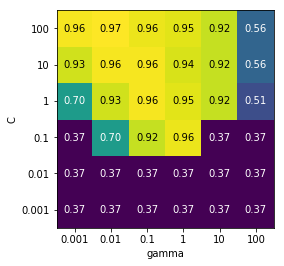

In [38]:
# 히트맵 시각화 : 2차원 표이므로
scores = np.array(results['mean_test_score']).reshape(6,6)

# 히트맵 그래프  : 교차 검증 평균 점수 
mglearn.tools.heatmap(scores, 
                             xlabel = 'gamma', xticklabels = param_grid['gamma'], 
                             ylabel = 'C', yticklabels = param_grid['C'], cmap = 'viridis')


# 높은 값일수록 밝은 색 : 즉, 교차검증의 정확도가 좋을 수록 밝은 색
# 밝은 색에 해당하는 parameter 조합이 좋다.

# 그래프 해석
# 색의 변화가 크다 : 민감하다 -> 즉 사용된 모델(SVC) 가 parameter 에 민감하다. 상세히 조정하며 변화 필요


# 검색 범위도 중요 : 너무 좁은 경우 다른 최적 매개변수 조합을 놓칠 수 있다.
# 즉, 히트맵을 그렸을 때, 밝은색부터 어두운색까지 있는 경우 잘 그린것(정확도를 포괄하는 범위를 선택한 것)

### 비대칭 매개변수 그리드 탐색
#### 매개변수의 변화에 따라 다른 매개변수도 변화하는 경우(사용 여부, 등등)
#### param_grid 딕셔너리를 만들어 GridSearchCV() 에 인자로 전달

In [39]:
# 커널 SVC 에서 사용할 함수인자로 실습해보자
# 사용할 함수 인자에 따라 다른 매개변수도 변한다.

param_grid = [
                    {'kernel' : ['rbf'], 
                     'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                     'gamma' : [0.001, 0.01, 0.1, 1, 10, 100] }, # rbf 함수를 커널함수로 사용할 경우 매개변수 C, gamma 둘다 변경시키겠다
                    {'kernel' : ['linear'],
                     'C' : [0.001, 0.01, 0.1, 1, 10, 100] } # linear 함수를 커널함수로 사용할 경우 매개변수 C만 변경시키겠다
]

# 세트가 되는 parameter 끼리 딕셔너리로 묶어준다.

In [40]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('최적 매개변수 : {}'.format(grid_search.best_params_))
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 매개변수 : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


In [41]:
# cv_results_ 속성을 통해 결과값을 보자
pd.DataFrame(grid_search.cv_results_).T

c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python36\lib\site-packages\sklearn\ut

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00239735,0.00119939,0.00160174,0.00139937,0.00140009,0.00139914,0.000999498,0.00119972,0.00099864,0.00139866,...,0.00039978,0.000796843,0.00139899,0.00179834,0.000802946,0.000596046,0.000799561,0.00080328,0.000599194,0.000599527
mean_score_time,0.000800323,0.000399685,0.000597715,0.00039959,0.000799465,0.000599289,0.000199795,0.000599718,0.000799513,0.000999641,...,0.00059948,0.000399971,0.000399828,0.000399637,0.000199842,0.000400019,0.000399923,0.000399828,0.000396729,0.000403309
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


### 그리드 서치에 다양한 교차검증 적용
#### p.311 교차검증 상세 옵션 : GridSearchCV( cv = )

### 중첩 교차 검증
#### GridSearchCV() : train data / test data 로만 -> 불안정, 데이터 분할에 의존
#### GridSearchCV() (매개변수 찾기) 에서 test 데이터를 사용하지 않고, cross_validation 에서만 사용하게 따로 보관

In [42]:
param_grid = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100] }

scores = cross_val_score(  GridSearchCV(SVC(), param_grid, cv = 5), #안쪽 루프 : 5겹 교차 검증
                                   iris.data, iris.target, cv = 5 ) # 바깥 루프 : 5겹 교차 검증

print('교차 분석 점수들 : \n{}'.format(scores))
print('교차 분석 평균 점수 : {}'.format(np.mean(scores)))

교차 분석 점수들 : 
[0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 분석 평균 점수 : 0.9800000000000001


### 교차 검증과 그리드 서치 병렬화
#### 대용량의 경우 병렬화를 하면 처리하기 좋다. 매개변수 별 모델은 서로 독립적으로 진행할 수 있기 때문이다.
#### 즉, 각 매개변수에 대해 하나 처리하고 다음 하나 처리하는 순차적인 방식으로 할 필요가 없다는 것이다.
#### n_jobs = : 사용할 CPU 코어의 수를 지정

## 5.3 평가 지표와 측정
### 앞에서 평가 기준
#### 분류 : 정확도(Accuracy)
#### 회귀 : R squared
### 이외의 다양한 평가 지표를 알아보자

## 5.3.1 최종 목표를 기억하라
### 비즈니스 목표 : 고차원적인 목표
### 비즈니스 목표에 어느정도 부합하는지 평가할만한 지표가 있어야한다.
#### 실제 운영 시스템에 투입(비용 부담) 하기 전에 평가할 수 있는 좋은 근사지표가 있어야 함.

## 5.3.2 이진분류의 평가지표

### 이진 분류에서 에러
### 오분류
#### 1. False Positive : type I error
#### 2. False Negative : type 2 error
#### 비즈니스에 따라 둘의 중요도가 달라진다.

### 불균형 데이터셋
#### 두 클래스의 수가 서로 차이가 클 때
#### 그냥 정확도가 높아지는 오류가 발생할 수 있다

In [43]:
# 불균형 클래스 예시
from sklearn.datasets import load_digits

digits = load_digits()

y = digits.target == 9 # False: True 비율 = 9:1 (불균형 데이터 셋)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [44]:
# DummyClassifier : 무조건 많은 클래스로 분류 (strategy = 'most_frequent')

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('예측된 유니크 테이블 : {}'.format(np.unique(pred_most_frequent)))
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

# 모든 데이터 포인트를 False 로 예측했는데도 정확도 점수가 높게 나왔다...
# 데이터 자체가 불균형이기 때문에 이런 문제가 발생한다.

예측된 유니크 테이블 : [False]
테스트 점수 : 0.90


In [1]:
# DummyClasssifier(무작위 분류)  vs  LogisticRegression
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
logistic = LogisticRegression(C = 0.1).fit(X_train, y_train)

print('Dummy 정확도 점수 : {:.3f}'.format(dummy.score(X_test, y_test)))
print('Logistic 정확도 점수 : {:.3f}'.format(logistic.score(X_test, y_test)))

# 확실히 무작위 보다 Logistic 이 좋지만
## 무작위분류조차도 정확도가 80% 나 됌....
# 즉 불균형 데이터 자체의 문제

# 곧, 무작위 예측보다 얼마나 나은지 평가할 새로운 지표가 필요

NameError: name 'DummyClassifier' is not defined

## 오차 행렬
### coufusion_matrix() : 혼돈 행렬

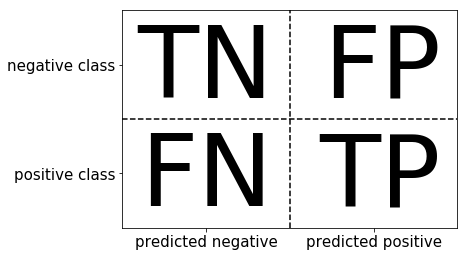

In [46]:
mglearn.plots.plot_binary_confusion_matrix()

In [47]:
# logistic 과 dummy 분류기에 대해 test 셋으로 분류한다.
pred_logistic = logistic.predict(X_test)
pred_dummy = dummy.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logistic)
confusion_dummy = confusion_matrix(y_test, pred_dummy)

print('오차 행렬(logistic) : \n{}'.format(confusion))

print('오차 행렬(dummy) : \n{}'.format(confusion_dummy))

# diagonal 요소는 정확히 분류된 것들

오차 행렬(logistic) : 
[[401   2]
 [  8  39]]
오차 행렬(dummy) : 
[[371  32]
 [ 45   2]]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(X_data, y_data,  model):
    '모델에 대해 오차행렬을 만들어줍니다.'
    model_instance = model
    #데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0)
    model_instance.fit(X_train, y_train)
    
    pred_model =model_instance.predict(X_test)
    confusion_model = confusion_matrix(y_test, pred_model)
    
    return confusion_model

In [50]:
# 각 모델에 대해 iris 데이터의 혼돈 행렬을 만들어보자
# 빈도기반 더미 / 더미(무작위) / 결정나무 / 로지스틱 회귀
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model_names = ['빈도 기반 더미','무작위 더미','의사결정나무','로지스틱회귀']
model_list =[ DummyClassifier(strategy = 'most_frequent'), 
                        DummyClassifier(), 
                        DecisionTreeClassifier(), 
                        LogisticRegression() ]


for i, models in enumerate(model_list):
    print('{} 모델 \n {}'.format(model_names[i], make_confusion_matrix(digits.data,y, models)))

빈도 기반 더미 모델 
 [[403   0]
 [ 47   0]]
무작위 더미 모델 
 [[366  37]
 [ 38   9]]
의사결정나무 모델 
 [[395   8]
 [ 12  35]]
로지스틱회귀 모델 
 [[399   4]
 [  7  40]]


### 오차행렬에서 평가 지표

### 정확도와의 관계

In [51]:
# 정확도(Accuracy)
logistic_conf_table = make_confusion_matrix(digits.data, y, LogisticRegression())

np.diag(logistic_conf_table).sum() / logistic_conf_table.sum()

0.9755555555555555

### 정밀도 & 재현율
#### 정밀도 : FP 를 줄이는 것이 목표일 때 사용
#### 재현율 : FN 를 줄이는 것이 목표일 때  사용, 양성 샘플을 식별해야 할 때 사용
#### 동의어 정리
##### 정확도
##### 민감도 = 재현율 = TPR = 적중률
##### 정밀도 = 양성예측도
#### 그 외의 사이트 : https://en.wikipedia.org/wiki/Sensitiviy_and_specificity

In [52]:
# 정밀도(Precision) (Predictive Positive Rate)
## 1 -> 1 / (0->1 + 1-> 1)(1로 예측된 것)

# 재현율(recall = Accuracy)
## 1 -> 1 / (1 -> 0 + 1-> 1)(실제 1인 것)

### 재현율과 정밀도는 상충관계
#### F1 점수
#### 정밀도 재현율의 조화 평균

In [53]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_logistic) # 이런식으로 구할 수 있다.

0.8863636363636364

In [54]:
## 평가 기준 모두 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logistic, 
                             target_names = ['not 9', '9']))

# 원래 양성클래스를 9로 했는데
# target_names 으로 이름 순서를 바꿈으로써 
# 여기서는 not 9 를 양성 클래스로 간주한다.

             precision    recall  f1-score   support

      not 9       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [55]:
print(classification_report(y_test, pred_dummy,
                                 target_names = ['not 9','9']))

             precision    recall  f1-score   support

      not 9       0.89      0.92      0.91       403
          9       0.06      0.04      0.05        47

avg / total       0.80      0.83      0.82       450



### 불확실성 고려
#### 각 그룹에 '속할 확률'
#### 이진 탐색에서의 임계값: decision_function 은 0, predict_proba 는 0.5 
#### - decision_function > 0 -> class 1

In [56]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples = (400, 50), centers = 2, cluster_std = [7.0, 2], random_state = 22)

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 0)

svc = SVC(gamma = .05).fit(X_train, y_train)

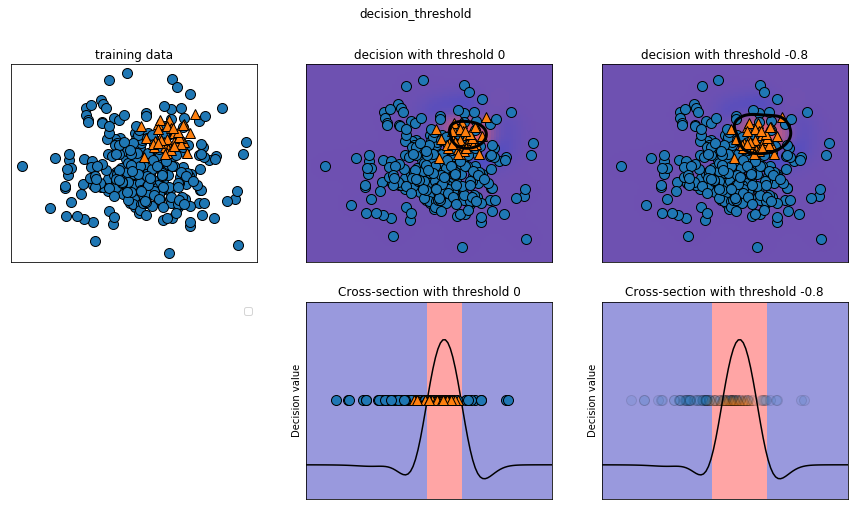

In [57]:
mglearn.plots.plot_decision_threshold()
# 중앙 부분 검정색 원 : decision_function 이 0인 부분(임계값)

In [58]:
print(classification_report(y_test, svc.predict(X_test)))

# class 1 은 정밀도와 재현율이 매우 낮다.
# class 0 의 샘플 수가 현저히 많아 
## 분류기는 class 0 에 초점을 맞춘다.

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [59]:
# 만약 재현율을 높이는 것(1로 잘 예측)이 목표라면
# 임계값을 바꾸어 재현율을 높일 수 있다.
# 더 많은 포인트가 class 1로 분류되기 위해서는 임계값을 decision_function 의 임계값을 낮춰야한다.

y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

print(classification_report(y_test, y_pred_lower_threshold))
# 재현율이 높아지므로, 정밀도는 낮아진다. 
# class 1 의 재현율 = 1.0  의미 : 1 -> 0 으로 분류하는 것이 하나도 없다.

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



### 정밀도-재현율 곡선과 ROC curve
#### 임계값을 바꾸는 작업 : 정밀도와 재현율의 상충관계를 조정하는 작업
#### 운영 포인트 : 분류 모델의 최소 만족 조건을 제시하는 것( ex ) 재현율이 90% 이상이어야 한다.)
#### - 성능을 보장하는 지표

### 정밀도- 재현율 곡선
#### 정밀도와 재현율은 상충관계 : 정밀도와 재현율을 표현한 그래프
### sklearn.metrics.precision_recall_curve

In [60]:
from sklearn.metrics import precision_recall_curve

precison, recall, threshold = precision_recall_curve(
    y_test, svc.decision_function(X_test))

# 정밀도, 재현율 값을 정렬된 리스트로 반환


Text(0,0.5,'recall')

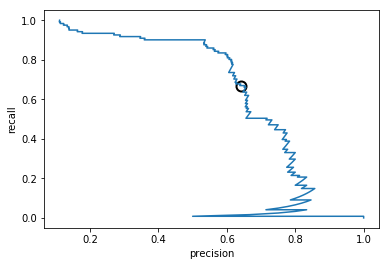

In [61]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘린다.
X,y = make_blobs(n_samples = (4000,500), centers = 2, cluster_std = [7.0, 2],
                        random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

#0에 가까운 임계값을 찾는다.

close_zero = np.argmin(np.abs(threshold))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, 
            label = 'thresholod = 0', fillstyle = 'none', c = 'k', mew = 2)

plt.plot(precision, recall, label =' precision - recall curve ')
plt.xlabel('precision')
plt.ylabel('recall')

# w

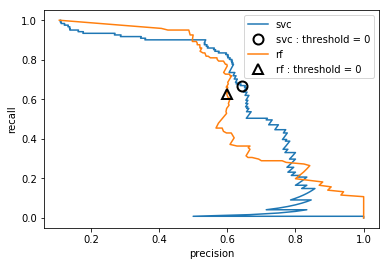

In [62]:
# 다른 분류기는 다른 부분에서 장점이 생긴다.
# 운영포인트가 달라진다.
# 예제 : randomforest vs SVM

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

# randomforest 는 decision_function 대신 predict_proba 제공
precision_rf, recall_rf, threshold_rf = precision_recall_curve(
        y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision, recall, label = 'svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
         label = 'svc : threshold = 0', fillstyle = 'none', c = 'k', mew = 2)

plt.plot(precision_rf, recall_rf, label = 'rf')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k',
         markersize = 10, label = 'rf : threshold = 0', fillstyle = 'none', mew = 2)

plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc = 'best')

In [63]:
# 정밀도 - 재현율 곡선의 요약방법
# 평균 정밀도 : 곡선 아래의 면적을 계산
# average_precision_score 함수

from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('랜덤 포레스트의 평균 정밀도 : {:.3f}'.format(ap_rf))
print('svc 의 평균 정밀도 : {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도 : 0.660
svc 의 평균 정밀도 : 0.666


### ROC 와 AUC
#### ROC 곡선 : 여러 임계값에서 분류기의 특성을 분석
#### 민감도, 1- 특이도
#### AUC : 무작위로 선택한 1 클래스의 포인트 점수가 0 클래스의 포인트 점수보다 높을 확률 
##### 불균형 데이터라도 무작위 분류 모델의 AUC 는 항상 0.5
##### 따라서 불균형 데이터에서 평가 지표는 AUC가 좋다.
#### sklearn.metrics.roc_curve
#### sklearn.metrics.roc_auc_score

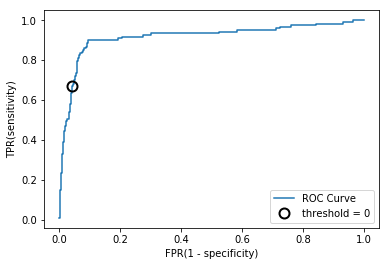

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr , threshold = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR(1 - specificity)')
plt.ylabel('TPR(sensitivity)')

# 0 근처의 임계값을 찾는다.
close_zero = argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
          label = 'threshold = 0', fillstyle = 'none', c= 'k', mew = 2)
plt.legend(loc = 4)

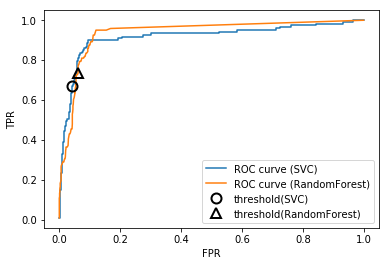

In [67]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label = 'ROC curve (SVC)') # x축 : false positive rat, y축 : true positive rate 로 그래프를 그린다.
plt.plot(fpr_rf, tpr_rf, label = 'ROC curve (RandomForest)')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10,
         label = 'threshold(SVC)', fillstyle = 'none', c = 'k', mew = 2)

plt.plot(fpr_rf[close_zero], tpr_rf[close_zero], '^', markersize = 10,
         label = 'threshold(RandomForest)', fillstyle = 'none', c = 'k', mew = 2)

plt.legend(loc = 'best')

In [76]:
# ROC curve 요약 : AUC(Area Under ROC Curve)

from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print('RandomForest AUC : {:.3f}'.format(rf_auc))
print('SVC AUC : {:.3f}'.format(svc_auc))

RandomForest AUC : 0.937
SVC AUC : 0.916


gamma = 1.00   정확도 = 0.90    AUC = 0.500
gamma = 0.10   정확도 = 0.90    AUC = 0.958
gamma = 0.01   정확도 = 0.90    AUC = 1.000


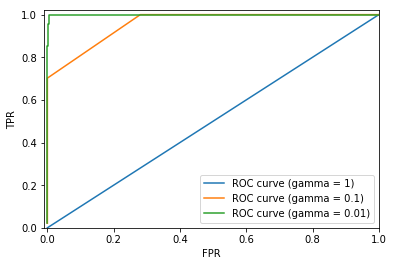

In [82]:
# 불균형 데이터에서 적용해보자
## 숫자 인식 데이터

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f}   정확도 = {:.2f}    AUC = {:.3f}'.format(gamma, accuracy, auc))
    
    plt.plot(fpr, tpr, label = 'ROC curve (gamma = {})'.format(gamma))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc = 'best')

## 5.3.3 다중 분류의 평가 지표
### 이진분류 평가 방식에서 파생되어 나옴 / 모든 클래스에 대해 평균을 취한 것
### 다중분류의 f1 점수 : 해당 클래스를 양성으로 두고, 나머지는 모두 음성으로 둔 후, 
### 각 클래스마다 f1 점수를 구하고 '평균'을 낸다.
#### 평균 내는 방식
#### 1. 'macro' : 모두 같은 비중으로 다뤄 평균을 낸다.
#### 2. 'weighted' : 샘플 수를 가중치로 둔 후 가중평균을 낸다.
#### 3. 'micro' : 모든 클래스의 FP, FN, TP 의 총 수를 헤아린 후 계산

In [90]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도 : {:.2f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬(카오스 매트릭스) : \n{}'.format(confusion_matrix(y_test, pred)))

# 꽤 좋은 성능을 보인다.



정확도 : 0.95
오차 행렬(카오스 매트릭스) : 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


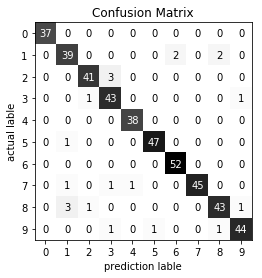

In [91]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel = 'prediction lable',
    ylabel = 'actual lable', xticklabels = digits.target_names,
    yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt ='%d')

plt.title('Confusion Matrix')
plt.gca().invert_yaxis()

In [92]:
# classification_report : f1 , 정밀도, 정확도 보기
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [94]:
calculation_list = ['micro','macro']

for cal in calculation_list:
    print('{} 의 평균 F1 점수 : {:.3f}'.format(cal, f1_score(y_test, pred, average = cal)))

micro 의 평균 F1 점수 : 0.953
macro 의 평균 F1 점수 : 0.954


## 5.3.4 회귀 평가 지표
### 회귀분류기.score : R squared 반환
#### 이 지표로도 충분하다

## 5.3.5 모델 선택에서 평가 지표 사용하기
### 여태까지 모델 선택(GridSearchCV , cross_val_score 에서는 모델간의 평가 점수를 accuracy 로 하였다)
### 만약 모델간의 비교 시 평가 방법을 AUC 등등으로 하고 싶은 경우
### scoring = '  ' 을 옵션으로 주면 된다.

In [96]:
# default 평가 지표는 Accuracy 이다.
print('기본 평가 지표 : {}'.format(
        cross_val_score(SVC(), digits.data, digits.target == 9)))
# scoring == 'accuracy' 옵션 : default 옵션
print('accuracy 평가 지표 : {}'.format(
        cross_val_score(SVC(), digits.data, digits.target == 9 , scoring = 'accuracy')))
# scoring == 'roc_auc' 옵션
print('AUC 평가 지표 : {}'.format(
        cross_val_score(SVC(), digits.data, digits.target == 9, scoring = 'roc_auc')))
      
    
# cross_validation 은 기본값으로 분류 시 (
## cv = 3 : 3개의 fold 로 평가하고
## StratifiedKFold 방법(계층적 KFold) 방법을 사용하여, 각 모델에 대해 점수를 매긴다.

기본 평가 지표 : [0.89983306 0.89983306 0.89983306]
accuracy 평가 지표 : [0.89983306 0.89983306 0.89983306]
AUC 평가 지표 : [0.99372294 0.98957947 0.99594929]


In [97]:
# GridSearchCV 에서도 평가지표를 변경할 수 있다.

### 가능한 평가방식

In [99]:
from sklearn.metrics.scorer import SCORERS

print('가능한 평가 방식 : \n {}'.format(sorted(SCORERS.keys())))

가능한 평가 방식 : 
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


## 5.4 요약 및 정리
### 